# Brain Tumor Classifier

## Import modules

In [1]:
from model.model_v1 import *
from utils.dataset_loader import *
from utils.loss_tracker import *
from utils.plot_utils import *

from torchvision.transforms import v2
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import ModelCheckpoint

## Setup

In [2]:
# Dataset dir path.
DATASET_DIR = "./data"

# Define input the image size (network input).
IMAGE_SIZE = 224

EPOCHS = 35
FINE_TUNE_EPOCHS = 35

# Define train set and test set transformations.
train_transform = v2.Compose([
    v2.Resize((IMAGE_SIZE, IMAGE_SIZE), antialias=True),                    
    v2.RandomHorizontalFlip(p=0.3),                           
    v2.RandomRotation(degrees=360),                             
    #v2.RandomZoomOut(p=0.1, side_range=(1.0, 2.0), fill=0),
    v2.ToTensor(), 
    v2.ToDtype(torch.float32, scale=True)
])

test_transform = v2.Compose([
    v2.Resize((IMAGE_SIZE, IMAGE_SIZE), antialias=True),                    
    v2.ToTensor(), 
    v2.ToDtype(torch.float32, scale=True)
])

# Define the datamodule.
brisc_dm = BRISCDataModule(
    data_dir=DATASET_DIR,
    batch_size=128,
    train_transform=train_transform,
    test_transform=test_transform,
    num_workers=9
)

/usr/lib/python3.13/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


## Plot dataset information

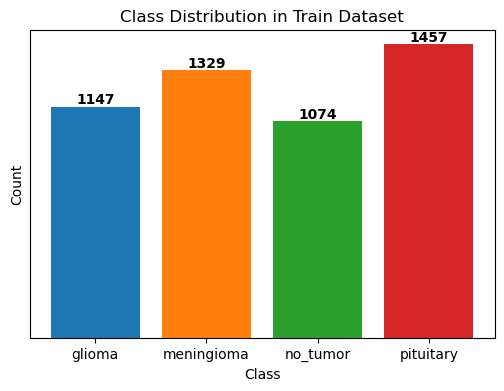

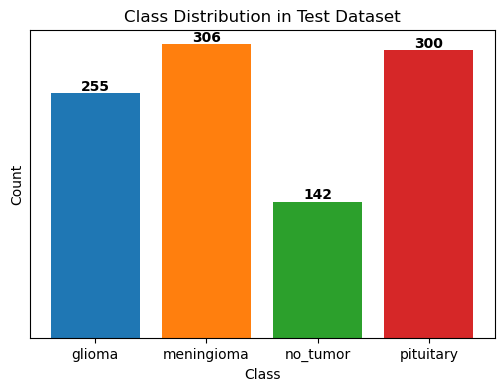

In [3]:
plot_distribution(DATASET_DIR, "Train")
plot_distribution(DATASET_DIR, "Test")

['./data/train/glioma/brisc2025_train_00253_gl_ax_t1.jpg', './data/train/meningioma/brisc2025_train_01420_me_ax_t1.jpg', './data/train/no_tumor/brisc2025_train_03414_no_sa_t1.jpg', './data/train/pituitary/brisc2025_train_04956_pi_sa_t1.jpg']


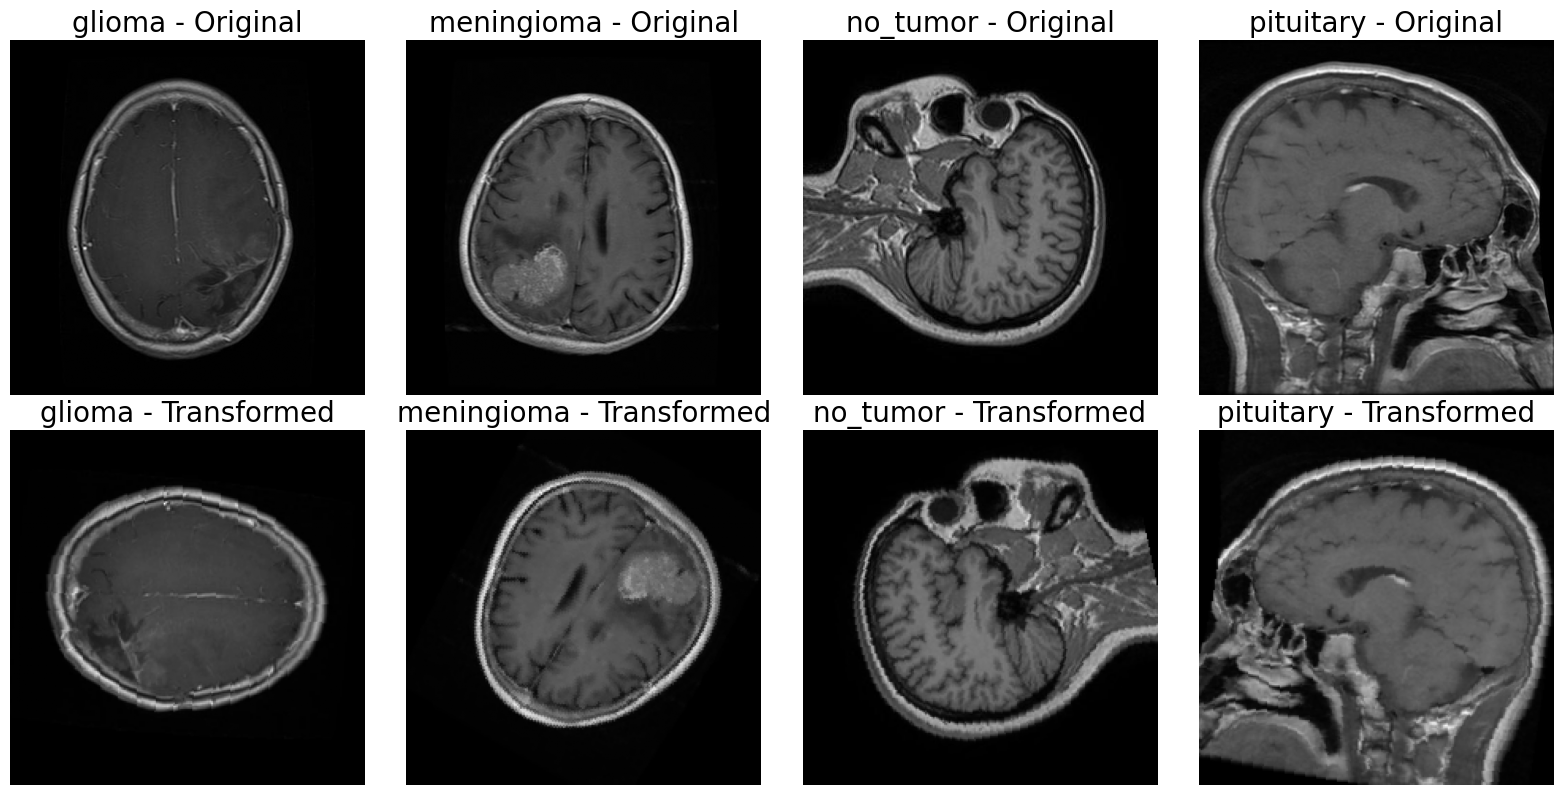

In [4]:
plot_samples(DATASET_DIR, transform=train_transform)

## Define the model

In [5]:
model = ResNetFineTuner(num_classes=4, lr=1e-4, freeze_backbone=True)
print(model)

ResNetFineTuner(
  (model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

/usr/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Train model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 SUPER') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
2.1 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.714    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,1.600293,0.183594


/usr/lib/python3.13/site-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (32) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,1.410660,0.297702


Epoch 0, global step 32: 'val_loss' reached 1.41066 (best 1.41066), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=00-val_loss=1.41.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
1,1.240145,0.500000,1.310708,0.392607


Epoch 1, global step 64: 'val_loss' reached 1.31071 (best 1.31071), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=01-val_loss=1.31.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
2,1.314496,0.421053,1.240501,0.475524


Epoch 2, global step 96: 'val_loss' reached 1.24050 (best 1.24050), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=02-val_loss=1.24.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
3,1.149902,0.526316,1.163240,0.546454


Epoch 3, global step 128: 'val_loss' reached 1.16324 (best 1.16324), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=03-val_loss=1.16.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
4,1.201428,0.473684,1.096462,0.588412


Epoch 4, global step 160: 'val_loss' reached 1.09646 (best 1.09646), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=04-val_loss=1.10.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
5,1.307859,0.368421,1.066823,0.615385


Epoch 5, global step 192: 'val_loss' reached 1.06682 (best 1.06682), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=05-val_loss=1.07.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
6,1.116411,0.526316,1.005800,0.656344


Epoch 6, global step 224: 'val_loss' reached 1.00580 (best 1.00580), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=06-val_loss=1.01.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
7,1.003318,0.684211,0.965578,0.672328


Epoch 7, global step 256: 'val_loss' reached 0.96558 (best 0.96558), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=07-val_loss=0.97.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
8,0.938297,0.684211,0.954600,0.692308


Epoch 8, global step 288: 'val_loss' reached 0.95460 (best 0.95460), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=08-val_loss=0.95.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
9,0.895519,0.842105,0.890401,0.724276


Epoch 9, global step 320: 'val_loss' reached 0.89040 (best 0.89040), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=09-val_loss=0.89.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
10,1.121660,0.526316,0.880386,0.708292


Epoch 10, global step 352: 'val_loss' reached 0.88039 (best 0.88039), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=10-val_loss=0.88.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
11,0.926709,0.684211,0.838337,0.733267


Epoch 11, global step 384: 'val_loss' reached 0.83834 (best 0.83834), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=11-val_loss=0.84.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
12,0.813803,0.789474,0.814533,0.742258


Epoch 12, global step 416: 'val_loss' reached 0.81453 (best 0.81453), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=12-val_loss=0.81.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
13,0.801395,0.763158,0.791142,0.753247


Epoch 13, global step 448: 'val_loss' reached 0.79114 (best 0.79114), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=13-val_loss=0.79.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
14,0.957593,0.684211,0.773321,0.773227


Epoch 14, global step 480: 'val_loss' reached 0.77332 (best 0.77332), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=14-val_loss=0.77.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
15,0.755572,0.789474,0.761383,0.780220


Epoch 15, global step 512: 'val_loss' reached 0.76138 (best 0.76138), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=15-val_loss=0.76.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
16,0.836668,0.710526,0.738715,0.765235


Epoch 16, global step 544: 'val_loss' reached 0.73872 (best 0.73872), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=16-val_loss=0.74.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
17,0.811015,0.657895,0.729697,0.786214


Epoch 17, global step 576: 'val_loss' reached 0.72970 (best 0.72970), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=17-val_loss=0.73.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
18,0.685710,0.868421,0.696692,0.798202


Epoch 18, global step 608: 'val_loss' reached 0.69669 (best 0.69669), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=18-val_loss=0.70.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
19,0.786494,0.710526,0.707495,0.774226


Epoch 19, global step 640: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
20,0.690538,0.789474,0.676439,0.791209


Epoch 20, global step 672: 'val_loss' reached 0.67644 (best 0.67644), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=20-val_loss=0.68.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
21,0.615974,0.842105,0.674491,0.802198


Epoch 21, global step 704: 'val_loss' reached 0.67449 (best 0.67449), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=21-val_loss=0.67.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
22,0.674463,0.815789,0.666478,0.787213


Epoch 22, global step 736: 'val_loss' reached 0.66648 (best 0.66648), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=22-val_loss=0.67.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
23,0.630252,0.868421,0.656394,0.803197


Epoch 23, global step 768: 'val_loss' reached 0.65639 (best 0.65639), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=23-val_loss=0.66.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
24,0.584842,0.842105,0.649816,0.783217


Epoch 24, global step 800: 'val_loss' reached 0.64982 (best 0.64982), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=24-val_loss=0.65.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
25,0.609019,0.842105,0.638559,0.797203


Epoch 25, global step 832: 'val_loss' reached 0.63856 (best 0.63856), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=25-val_loss=0.64.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
26,0.685728,0.684211,0.632849,0.797203


Epoch 26, global step 864: 'val_loss' reached 0.63285 (best 0.63285), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=26-val_loss=0.63.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
27,0.621029,0.842105,0.641306,0.795205


Epoch 27, global step 896: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
28,0.593933,0.842105,0.632270,0.798202


Epoch 28, global step 928: 'val_loss' reached 0.63227 (best 0.63227), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=28-val_loss=0.63.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
29,0.890860,0.605263,0.616369,0.789211


Epoch 29, global step 960: 'val_loss' reached 0.61637 (best 0.61637), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=29-val_loss=0.62.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
30,0.637505,0.789474,0.588998,0.807193


Epoch 30, global step 992: 'val_loss' reached 0.58900 (best 0.58900), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=30-val_loss=0.59.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
31,0.609688,0.789474,0.607074,0.804196


Epoch 31, global step 1024: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
32,0.768705,0.736842,0.581781,0.817183


Epoch 32, global step 1056: 'val_loss' reached 0.58178 (best 0.58178), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=32-val_loss=0.58.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
33,0.706291,0.789474,0.594131,0.807193


Epoch 33, global step 1088: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
34,0.666518,0.763158,0.578017,0.827173


Epoch 34, global step 1120: 'val_loss' reached 0.57802 (best 0.57802), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=34-val_loss=0.58.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=35` reached.


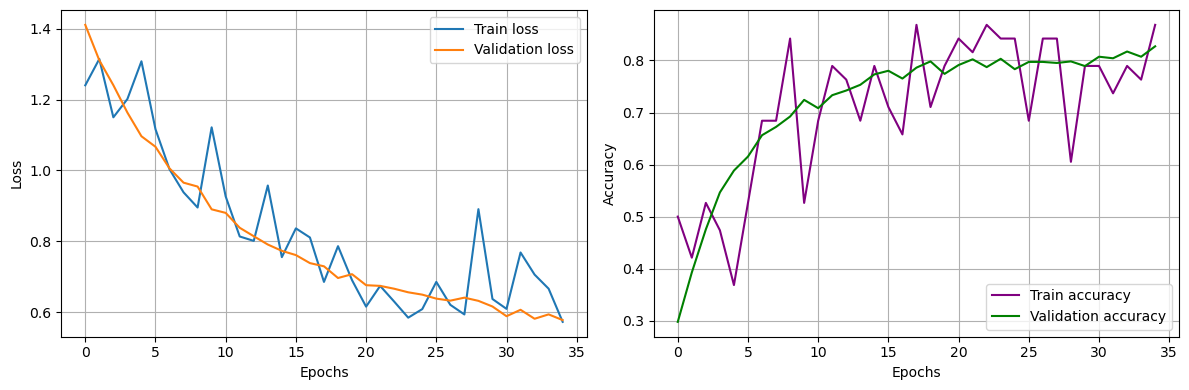

In [6]:
# Define the loss tracker callback.
loss_tracker = LossTracker()

# Define the early stopping callback.
early_stopping = EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=5
)

# Define the checkpoint callback.
# (Used to save the model with the lowest
# validation loss).
checkpoint_callback = ModelCheckpoint(
    monitor="val_loss",
    mode="min",
    save_top_k=1,
    filename="best-checkpoint-{epoch:02d}-{val_loss:.2f}",
    verbose=True
)

# Define the trainer.
trainer = L.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=EPOCHS,
    callbacks=[loss_tracker, early_stopping, checkpoint_callback],
    enable_progress_bar=False,
)

# Train model.
trainer.fit(model, brisc_dm)
# Plot losses.
loss_tracker.plot()

## Fine tuning the model

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/lib/python3.13/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | ResNet           | 11.2 M | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.714    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,0.604737,0.808594


Epoch,train_loss,train_acc,val_loss,val_acc
0,-1,-1,0.268431,0.892108


Epoch 0, global step 32: 'val_loss' reached 0.26843 (best 0.26843), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=00-val_loss=0.27.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
1,0.131791,0.947368,0.128852,0.953047


Epoch 1, global step 64: 'val_loss' reached 0.12885 (best 0.12885), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=01-val_loss=0.13.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
2,0.076922,1.000000,0.100981,0.962038


Epoch 2, global step 96: 'val_loss' reached 0.10098 (best 0.10098), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=02-val_loss=0.10.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
3,0.169927,0.921053,0.094547,0.961039


Epoch 3, global step 128: 'val_loss' reached 0.09455 (best 0.09455), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=03-val_loss=0.09.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
4,0.060345,0.973684,0.074135,0.977023


Epoch 4, global step 160: 'val_loss' reached 0.07413 (best 0.07413), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=04-val_loss=0.07.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
5,0.063397,0.973684,0.090074,0.966034


Epoch 5, global step 192: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
6,0.106400,0.947368,0.053336,0.984016


Epoch 6, global step 224: 'val_loss' reached 0.05334 (best 0.05334), saving model to '/home/luca/Documents/git/Brain_Tumor_Classifier/lightning_logs/version_73/checkpoints/best-checkpoint-epoch=06-val_loss=0.05.ckpt' as top 1


Epoch,train_loss,train_acc,val_loss,val_acc
7,0.047006,0.973684,0.059168,0.978022


Epoch 7, global step 256: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
8,0.036148,0.973684,0.069726,0.975025


Epoch 8, global step 288: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
9,0.026335,1.000000,0.085581,0.978022


Epoch 9, global step 320: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
10,0.010238,1.000000,0.089192,0.968032


Epoch 10, global step 352: 'val_loss' was not in top 1


Epoch,train_loss,train_acc,val_loss,val_acc
11,0.055537,0.973684,0.077282,0.969031


Epoch 11, global step 384: 'val_loss' was not in top 1


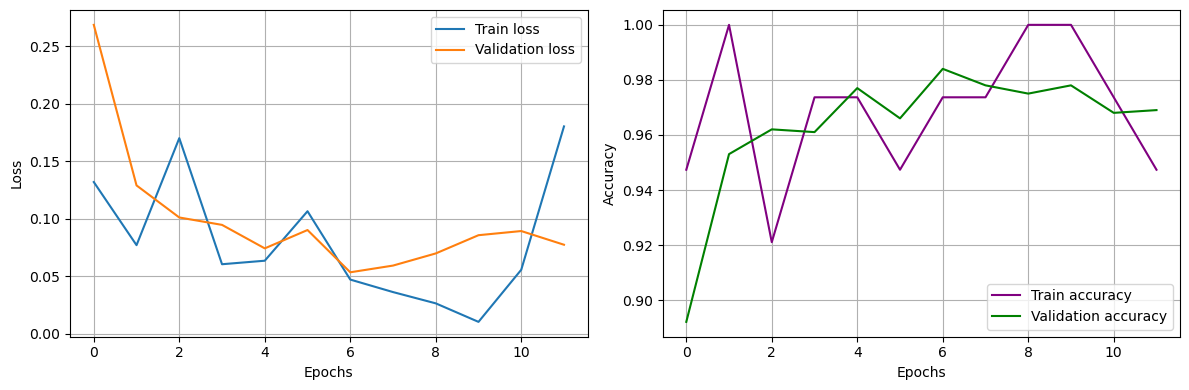

In [7]:
# Load best model.
model = ResNetFineTuner.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

# Unfreeze backbone.
for param in model.parameters():
    param.requires_grad = True

# Reset plots.
loss_tracker.train_loss = []
loss_tracker.train_acc = []
loss_tracker.val_loss = []
loss_tracker.val_acc = []

# Re-define the trainer.
trainer = L.Trainer(
    accelerator="auto",
    devices=1,
    max_epochs=FINE_TUNE_EPOCHS,
    callbacks=[loss_tracker, early_stopping, checkpoint_callback],
    enable_progress_bar=False
)

# Re-start training.
trainer.fit(model, brisc_dm)
# Plot losses.
loss_tracker.plot()

In [8]:
# Load the best model (after fine tuning).
model = ResNetFineTuner.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

# Test model.
trainer.test(model, brisc_dm)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9601196646690369     │
│         test_loss         │    0.11411119997501373    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.11411119997501373, 'test_acc': 0.9601196646690369}]

## Plot performances

Classification Report:

              precision    recall  f1-score   support

      glioma       0.99      0.92      0.95       255
  meningioma       0.92      0.96      0.94       306
    no_tumor       0.96      1.00      0.98       142
   pituitary       0.98      0.98      0.98       300

    accuracy                           0.96      1003
   macro avg       0.96      0.96      0.96      1003
weighted avg       0.96      0.96      0.96      1003



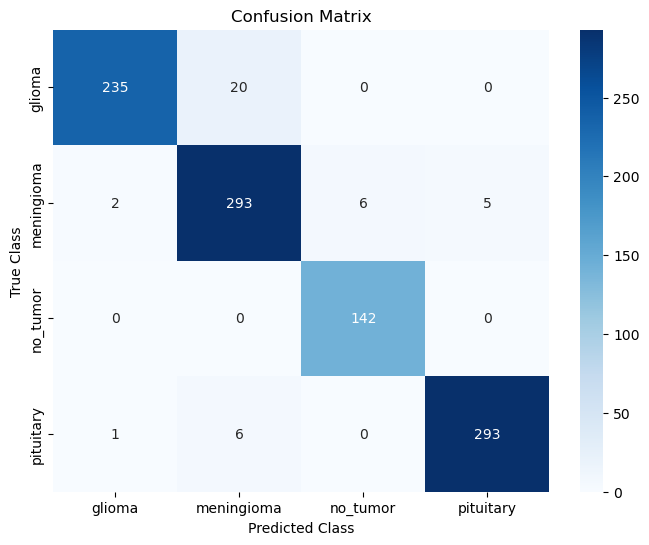

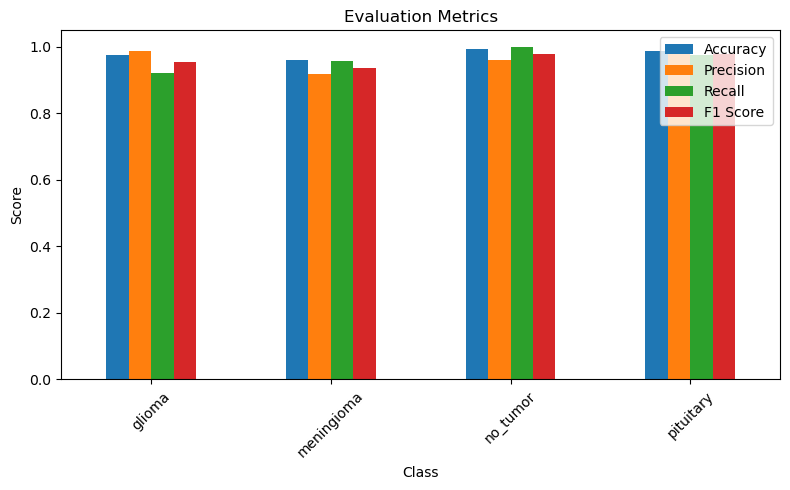

In [9]:
# Plot confusion matrix.
cm = plot_confusion_matrix(brisc_dm, model)

# Plot various statistics of the results.
plot_statistics(cm)